In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import copy

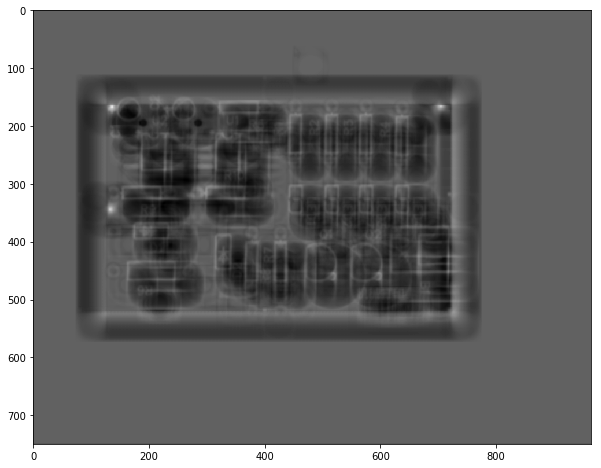

In [10]:
img = cv2.imread('./电路板.png', 0)
temp = cv2.imread("./temp.png", 0)
imgcopy = copy.deepcopy(img)
w, h = temp.shape
result = cv2.matchTemplate(img, temp, cv2.TM_CCORR_NORMED)

plt.figure(figsize=(10, 10))
plt.imshow(result, cmap='gray')

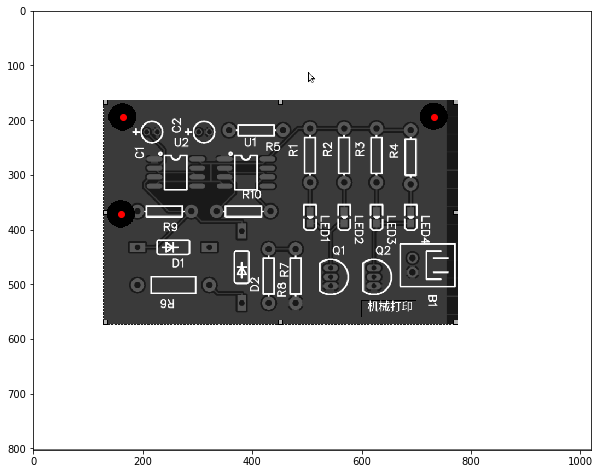

In [11]:
index = []
i = 0

maxl = 0
for i in range(3):
    i = i + 1
    result = cv2.matchTemplate(img, temp, cv2.TM_CCORR_NORMED)
    minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(result)
    # print("i", i, "maxLoc", maxLoc)
    index.append(maxLoc)
    img[maxLoc[1]:maxLoc[1]+w, maxLoc[0]:maxLoc[0]+h] = 255

x_orignal = [i[0]+w/2 for i in index]
y_orignal = [i[1]+h/2 for i in index]

plt.figure(1, figsize=(10, 10))
plt.imshow(imgcopy,cmap='gray' )
plt.scatter(x_orignal,y_orignal, c='r')


In [13]:
point3 = []
for i in range(3):
    point3.append([x_orignal[i],y_orignal[i]])

In [18]:
distance_temp = []
for i in range(3):
    num = []
    a = point3[i]
    num.append(a)
    dis = []
    for j in range(2):
        b = point3[(i+j+1) % 3]
        dis.append( (a[0] - b[0])**2 + (a[1] - b[1])**2 )
    if dis[0] < dis[1]:
        num.append((dis[1], dis[0]))
    else:
        num.append((dis[0], dis[1]))
    distance_temp.append(num)

In [19]:
distance_temp

[[[163.0, 195.0], (323762.0, 31338.0)],
 [[160.0, 372.0], (358868.0, 31338.0)],
 [[732.0, 194.0], (358868.0, 323762.0)]]

In [21]:
distance_temp = sorted(distance_temp, key=lambda x:x[1])

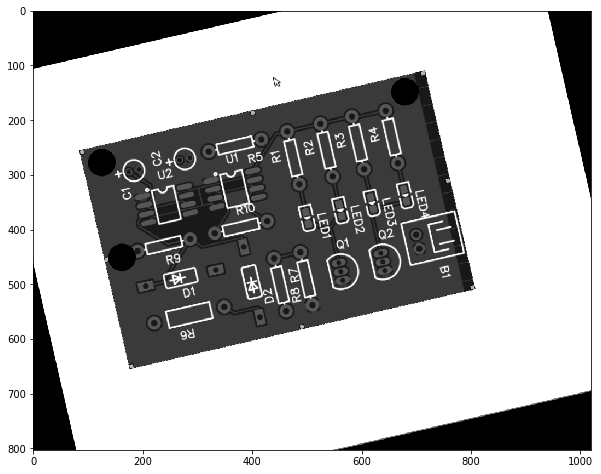

In [38]:
img = cv2.imread('./电路板2.png', 0)
w, h = img.shape
center = (h/2,w/2)

M = cv2.getRotationMatrix2D(center,np.random.randint(0,360),1)#旋转缩放矩阵：(旋转中心，旋转角度，缩放因子)
temp_rotated = cv2.warpAffine(img,M,(h,w))
temp_rotated_copy = copy.deepcopy(temp_rotated)
plt.figure(figsize=(10, 10))
plt.imshow(temp_rotated, cmap="gray")

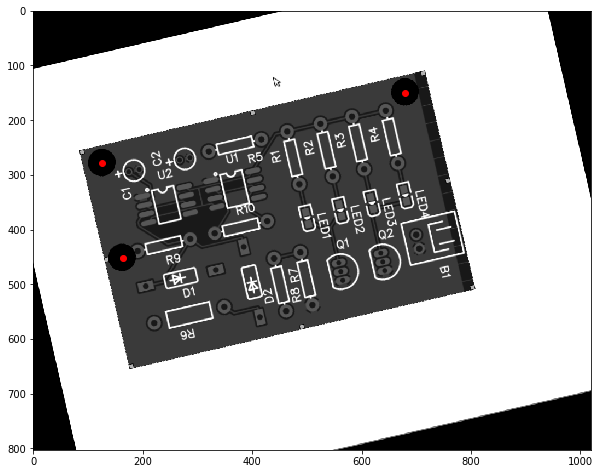

In [39]:
index = []
i = 0
w, h = temp.shape
maxl = 0
for i in range(3):
    result = cv2.matchTemplate(temp_rotated, temp, cv2.TM_CCORR_NORMED)
    minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(result)
    # print("i", i, "maxLoc", maxLoc)
    index.append(maxLoc)
    temp_rotated[maxLoc[1]:maxLoc[1]+w, maxLoc[0]:maxLoc[0]+h] = 255

x_orignal = [i[0]+w/2 for i in index]
y_orignal = [i[1]+h/2 for i in index]

plt.figure(1, figsize=(10, 10))
plt.imshow(temp_rotated_copy,cmap='gray' )
plt.scatter(x_orignal,y_orignal, c='r')


In [41]:
point3_img = []
for i in range(3):
    point3_img.append([x_orignal[i],y_orignal[i]])

In [42]:
distance_img = []
for i in range(3):
    num = []
    a = point3_img[i]
    num.append(a)
    dis = []
    for j in range(2):
        b = point3_img[(i+j+1) % 3]
        dis.append( (a[0] - b[0])**2 + (a[1] - b[1])**2 )
    if dis[0] < dis[1]:
        num.append((dis[1], dis[0]))
    else:
        num.append((dis[0], dis[1]))
    distance_img.append(num)

In [43]:
distance_img = sorted(distance_img, key=lambda x:x[1])

In [45]:
print(distance_temp)
print(distance_img)

[[[163.0, 195.0], (323762.0, 31338.0)], [[160.0, 372.0], (358868.0, 31338.0)], [[732.0, 194.0], (358868.0, 323762.0)]]
[[[125.0, 279.0], (324409.0, 31028.0)], [[163.0, 451.0], (357289.0, 31028.0)], [[680.0, 151.0], (357289.0, 324409.0)]]


In [49]:
src = []
dst = []
for i in range(3):
    src.append(distance_temp[i][0])
    dst.append(distance_img[i][0])
src = np.float32(src)
dst = np.float32(dst)

In [53]:
H = cv2.getAffineTransform(src[0:3], dst[0:3])

In [54]:
H

array([[  0.97580181,   0.23122828, -79.14520902],
       [ -0.22325489,   0.96796743, 126.63689802]])

In [71]:
h = [[700, 560], [600, 560], [600, 530], [700, 530]]
ss = []
for i in h:
    index = np.array([i[0], i[1], 1])
    print("index.shape", index.shape)
    ss.append(np.dot(H, index).tolist())
ss = np.int64(ss)
print("ss", ss)

index.shape (3,)
index.shape (3,)
index.shape (3,)
index.shape (3,)
ss [[733 512]
 [635 534]
 [628 505]
 [726 483]]


In [72]:
a = cv2.polylines(img=temp_rotated_copy, pts=[ss], isClosed=True, color=255, thickness=3)

In [73]:
cv2.imshow("2", a)
cv2.waitKey()
cv2.destroyAllWindows()